# Supervised Learning with Scikit-Learn

## Telco Customer Churn Dataset

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
!wget https://github.com/mpolinowski/datasets/raw/master/telco_customer_churn.csv -P dataset

--2023-05-28 14:55:29--  https://github.com/mpolinowski/datasets/raw/master/telco_customer_churn.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mpolinowski/datasets/master/telco_customer_churn.csv [following]
--2023-05-28 14:55:32--  https://raw.githubusercontent.com/mpolinowski/datasets/master/telco_customer_churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 900015 (879K) [text/plain]
Saving to: ‘dataset/telco_customer_churn.csv’

telco_customer_chur 100%[===================>] 878.92K   898KB/s    in 1.0s    

2023-05-28

In [2]:
telco_df = pd.read_csv('dataset/telco_customer_churn.csv')
telco_df.head(5).transpose()

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


|  | 0 | 1 | 2 | 3 | 4 |
| -- | -- | -- | -- | -- | -- |
| gender | Female | Male | Male | Male | Female |
| SeniorCitizen | 0 | 0 | 0 | 0 | 0 |
| Partner | Yes | No | No | No | No |
| Dependents | No | No | No | No | No |
| tenure | 1 | 34 | 2 | 45 | 2 |
| PhoneService | No | Yes | Yes | No | Yes |
| MultipleLines | No phone service | No | No | No phone service | No |
| InternetService | DSL | DSL | DSL | DSL | Fiber optic |
| OnlineSecurity | No | Yes | Yes | Yes | No |
| OnlineBackup | Yes | No | Yes | No | No |
| DeviceProtection | No | Yes | No | Yes | No |
| TechSupport | No | No | No | Yes | No |
| StreamingTV | No | No | No | No | No |
| StreamingMovies | No | No | No | No | No |
| Contract | Month-to-month | One year | Month-to-month | One year | Month-to-month |
| PaperlessBilling | Yes | No | Yes | No | Yes |
| PaymentMethod | Electronic check | Mailed check | Mailed check | Bank transfer (automatic) | Electronic check |
| MonthlyCharges | 29.85 | 56.95 | 53.85 | 42.3 | 70.7 |
| TotalCharges | 29.85 | 1889.5 | 108.15 | 1840.75 | 151.65 |
| Churn | No | No | Yes | No | Yes |

### Feature Exploration

In [14]:
# check for missing data or wrong dtype
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


`<class 'pandas.core.frame.DataFrame'>`

RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):

| # | Column | Non-Null Count | Dtype |
| -- | -- | -- | -- |
| 0 | gender | 7043 non-null | object |
| 1 | SeniorCitizen | 7043 non-null | int64|
| 2 | Partner | 7043 non-null | object |
| 3 | Dependents | 7043 non-null | object |
| 4 | tenure | 7043 non-null | int64|
| 5 | PhoneService | 7043 non-null | object |
| 6 | MultipleLines | 7043 non-null | object |
| 7 | InternetService | 7043 non-null | object |
| 8 | OnlineSecurity | 7043 non-null | object |
| 9 | OnlineBackup | 7043 non-null | object |
| 10 | DeviceProtection | 7043 non-null | object |
| 11 | TechSupport | 7043 non-null | object |
| 12 | StreamingTV | 7043 non-null | object |
| 13 | StreamingMovies | 7043 non-null | object |
| 14 | Contract | 7043 non-null | object |
| 15 | PaperlessBilling | 7043 non-null | object |
| 16 | PaymentMethod | 7043 non-null | object |
| 17 | MonthlyCharges | 7043 non-null | float64|
| 18 | TotalCharges | 7043 non-null | object |
| 19 | Churn | 7043 non-null | object |
_dtypes: float64(1), int64(2), object(17)_
_memory usage: 1.1+ MB_

In [3]:
# TotalCharges is type string because it contains SPACE's
# how many rows have a SPACE instad of a float value?
(telco_df['TotalCharges'] == ' ').sum()
# 11

11

In [4]:
# drop those 11 rows
telco_df = telco_df[telco_df['TotalCharges'] != ' ']

In [5]:
# now turn TotalCharges column into dtype=float
telco_df['TotalCharges'] = telco_df['TotalCharges'].apply(lambda string: float(string))
# Name: TotalCharges, Length: 7032, dtype: float64

In [6]:
# check for missing values
telco_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

| | |
| -- | -- |
| gender | 0 |
| SeniorCitizen | 0 |
| Partner | 0 |
| Dependents | 0 |
| tenure | 0 |
| PhoneService |  0 |
| MultipleLines | 0 |
| InternetService | 0 |
| OnlineSecurity |  0 |
| OnlineBackup |  0 |
| DeviceProtection | 0 |
| TechSupport |   0 |
| StreamingTV |   0 |
| StreamingMovies | 0 |
| Contract | 0 |
| PaperlessBilling | 0 |
| PaymentMethod | 0 |
| MonthlyCharges |  0 |
| TotalCharges |  0 |
| Churn |  0 |
_dtype: int64_

In [17]:
# check label distribution
telco_df['Churn'].value_counts()

# No     5174
# Yes    1869
# Name: Churn, dtype: int64

No     5174
Yes    1869
Name: Churn, dtype: int64

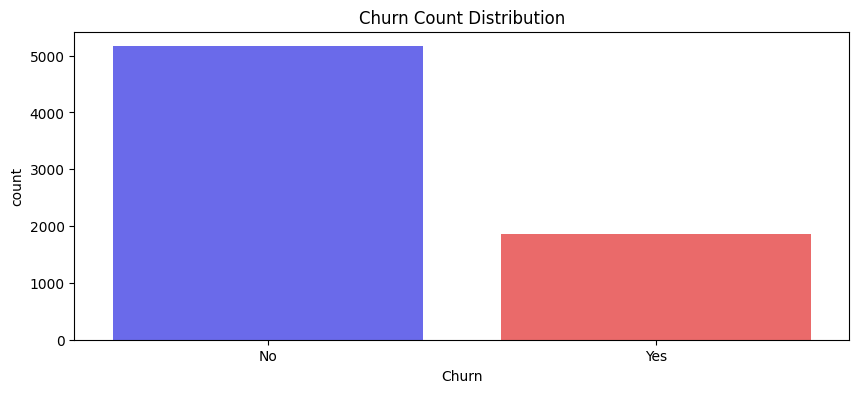

In [63]:
plt.figure(figsize=(10,4))
plt.title('Churn Count Distribution')
sns.countplot(data=telco_df, x='Churn', palette='seismic')
plt.savefig('assets/telco-customer-churn_01.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_01.webp)

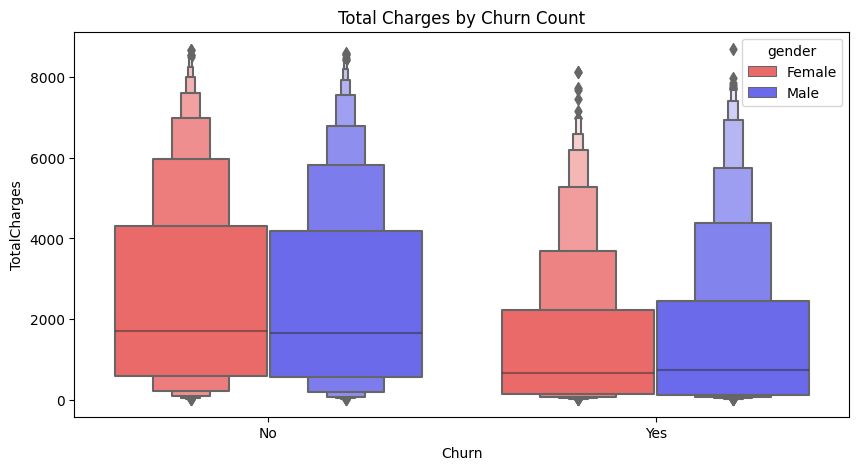

In [61]:
plt.figure(figsize=(10, 5))
plt.title('Total Charges by Churn Count')

sns.boxenplot(
    data=telco_df,
    x='Churn',
    y='TotalCharges',
    hue='gender',
    palette='seismic_r'
)
plt.savefig('assets/telco-customer-churn_02.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_02.webp)

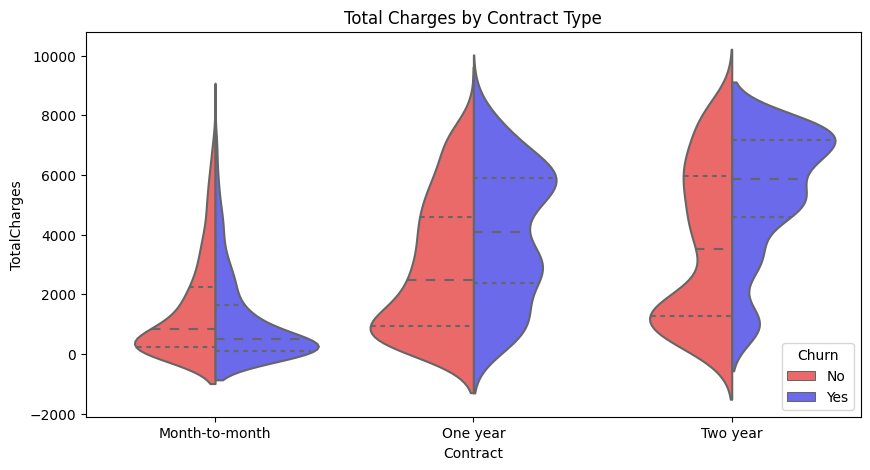

In [7]:
plt.figure(figsize=(10, 5))
plt.title('Total Charges by Contract Type')

sns.violinplot(
    data=telco_df,
    x='Contract',
    y='TotalCharges',
    hue='Churn',
    palette='seismic_r',
    orient='v',
    inner='quartile',
    bw=0.3,
    split=True
)
plt.legend(loc='lower right', title='Churn')
plt.savefig('assets/telco-customer-churn_03.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_03.webp)

In [7]:
# make values numeric to show correlation
telco_df_numeric = pd.get_dummies(telco_df[
    [
        'gender',
        'SeniorCitizen',
        'Partner',
        'Dependents',
        'PhoneService',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaperlessBilling',
        'PaymentMethod',
        'Churn'
    ]
], drop_first=True)

telco_df_numeric.head(5).transpose()

,0,1,2,3,4
SeniorCitizen,0,0,0,0,0
gender_Male,0,1,1,1,0
Partner_Yes,1,0,0,0,0
Dependents_Yes,0,0,0,0,0
PhoneService_Yes,0,1,1,0,1
MultipleLines_No phone service,1,0,0,1,0
MultipleLines_Yes,0,0,0,0,0
InternetService_Fiber optic,0,0,0,0,1
InternetService_No,0,0,0,0,0
OnlineSecurity_No internet service,0,0,0,0,0


|  | 0  | 1  | 2  | 3  | 4 |
| -- | -- | -- | -- | -- | -- |
| SeniorCitizen  | 0  | 0  | 0  | 0  | 0 |
| gender_Male  | 0  | 1  | 1  | 1  | 0 |
| Partner_Yes  | 1  | 0  | 0  | 0  | 0 |
| Dependents_Yes  | 0  | 0  | 0  | 0  | 0 |
| PhoneService_Yes  | 0  | 1  | 1  | 0  | 1 |
| MultipleLines_No phone service  | 1  | 0  | 0  | 1  | 0 |
| MultipleLines_Yes  | 0  | 0  | 0  | 0  | 0 |
| InternetService_Fiber optic  | 0  | 0  | 0  | 0  | 1 |
| InternetService_No  | 0  | 0  | 0  | 0  | 0 |
| OnlineSecurity_No internet service  | 0  | 0  | 0  | 0  | 0 |
| OnlineSecurity_Yes  | 0  | 1  | 1  | 1  | 0 |
| OnlineBackup_No internet service  | 0  | 0  | 0  | 0  | 0 |
| OnlineBackup_Yes  | 1  | 0  | 1  | 0  | 0 |
| DeviceProtection_No internet service  | 0  | 0  | 0  | 0  | 0 |
| DeviceProtection_Yes  | 0  | 1  | 0  | 1  | 0 |
| TechSupport_No internet service  | 0  | 0  | 0  | 0  | 0 |
| TechSupport_Yes  | 0  | 0  | 0  | 1  | 0 |
| StreamingTV_No internet service  | 0  | 0  | 0  | 0  | 0 |
| StreamingTV_Yes  | 0  | 0  | 0  | 0  | 0 |
| StreamingMovies_No internet service  | 0  | 0  | 0  | 0  | 0 |
| StreamingMovies_Yes  | 0  | 0  | 0  | 0  | 0 |
| Contract_One year  | 0  | 1  | 0  | 1  | 0 |
| Contract_Two year  | 0  | 0  | 0  | 0  | 0 |
| PaperlessBilling_Yes  | 1  | 0  | 1  | 0  | 1 |
| PaymentMethod_Credit card (automatic)  | 0  | 0  | 0  | 0  | 0 |
| PaymentMethod_Electronic check  | 1  | 0  | 0  | 0  | 1 |
| PaymentMethod_Mailed check  | 0  | 1  | 1  | 0  | 0 |
| Churn_Yes | 0 | 0 | 1 | 0 | 1 |

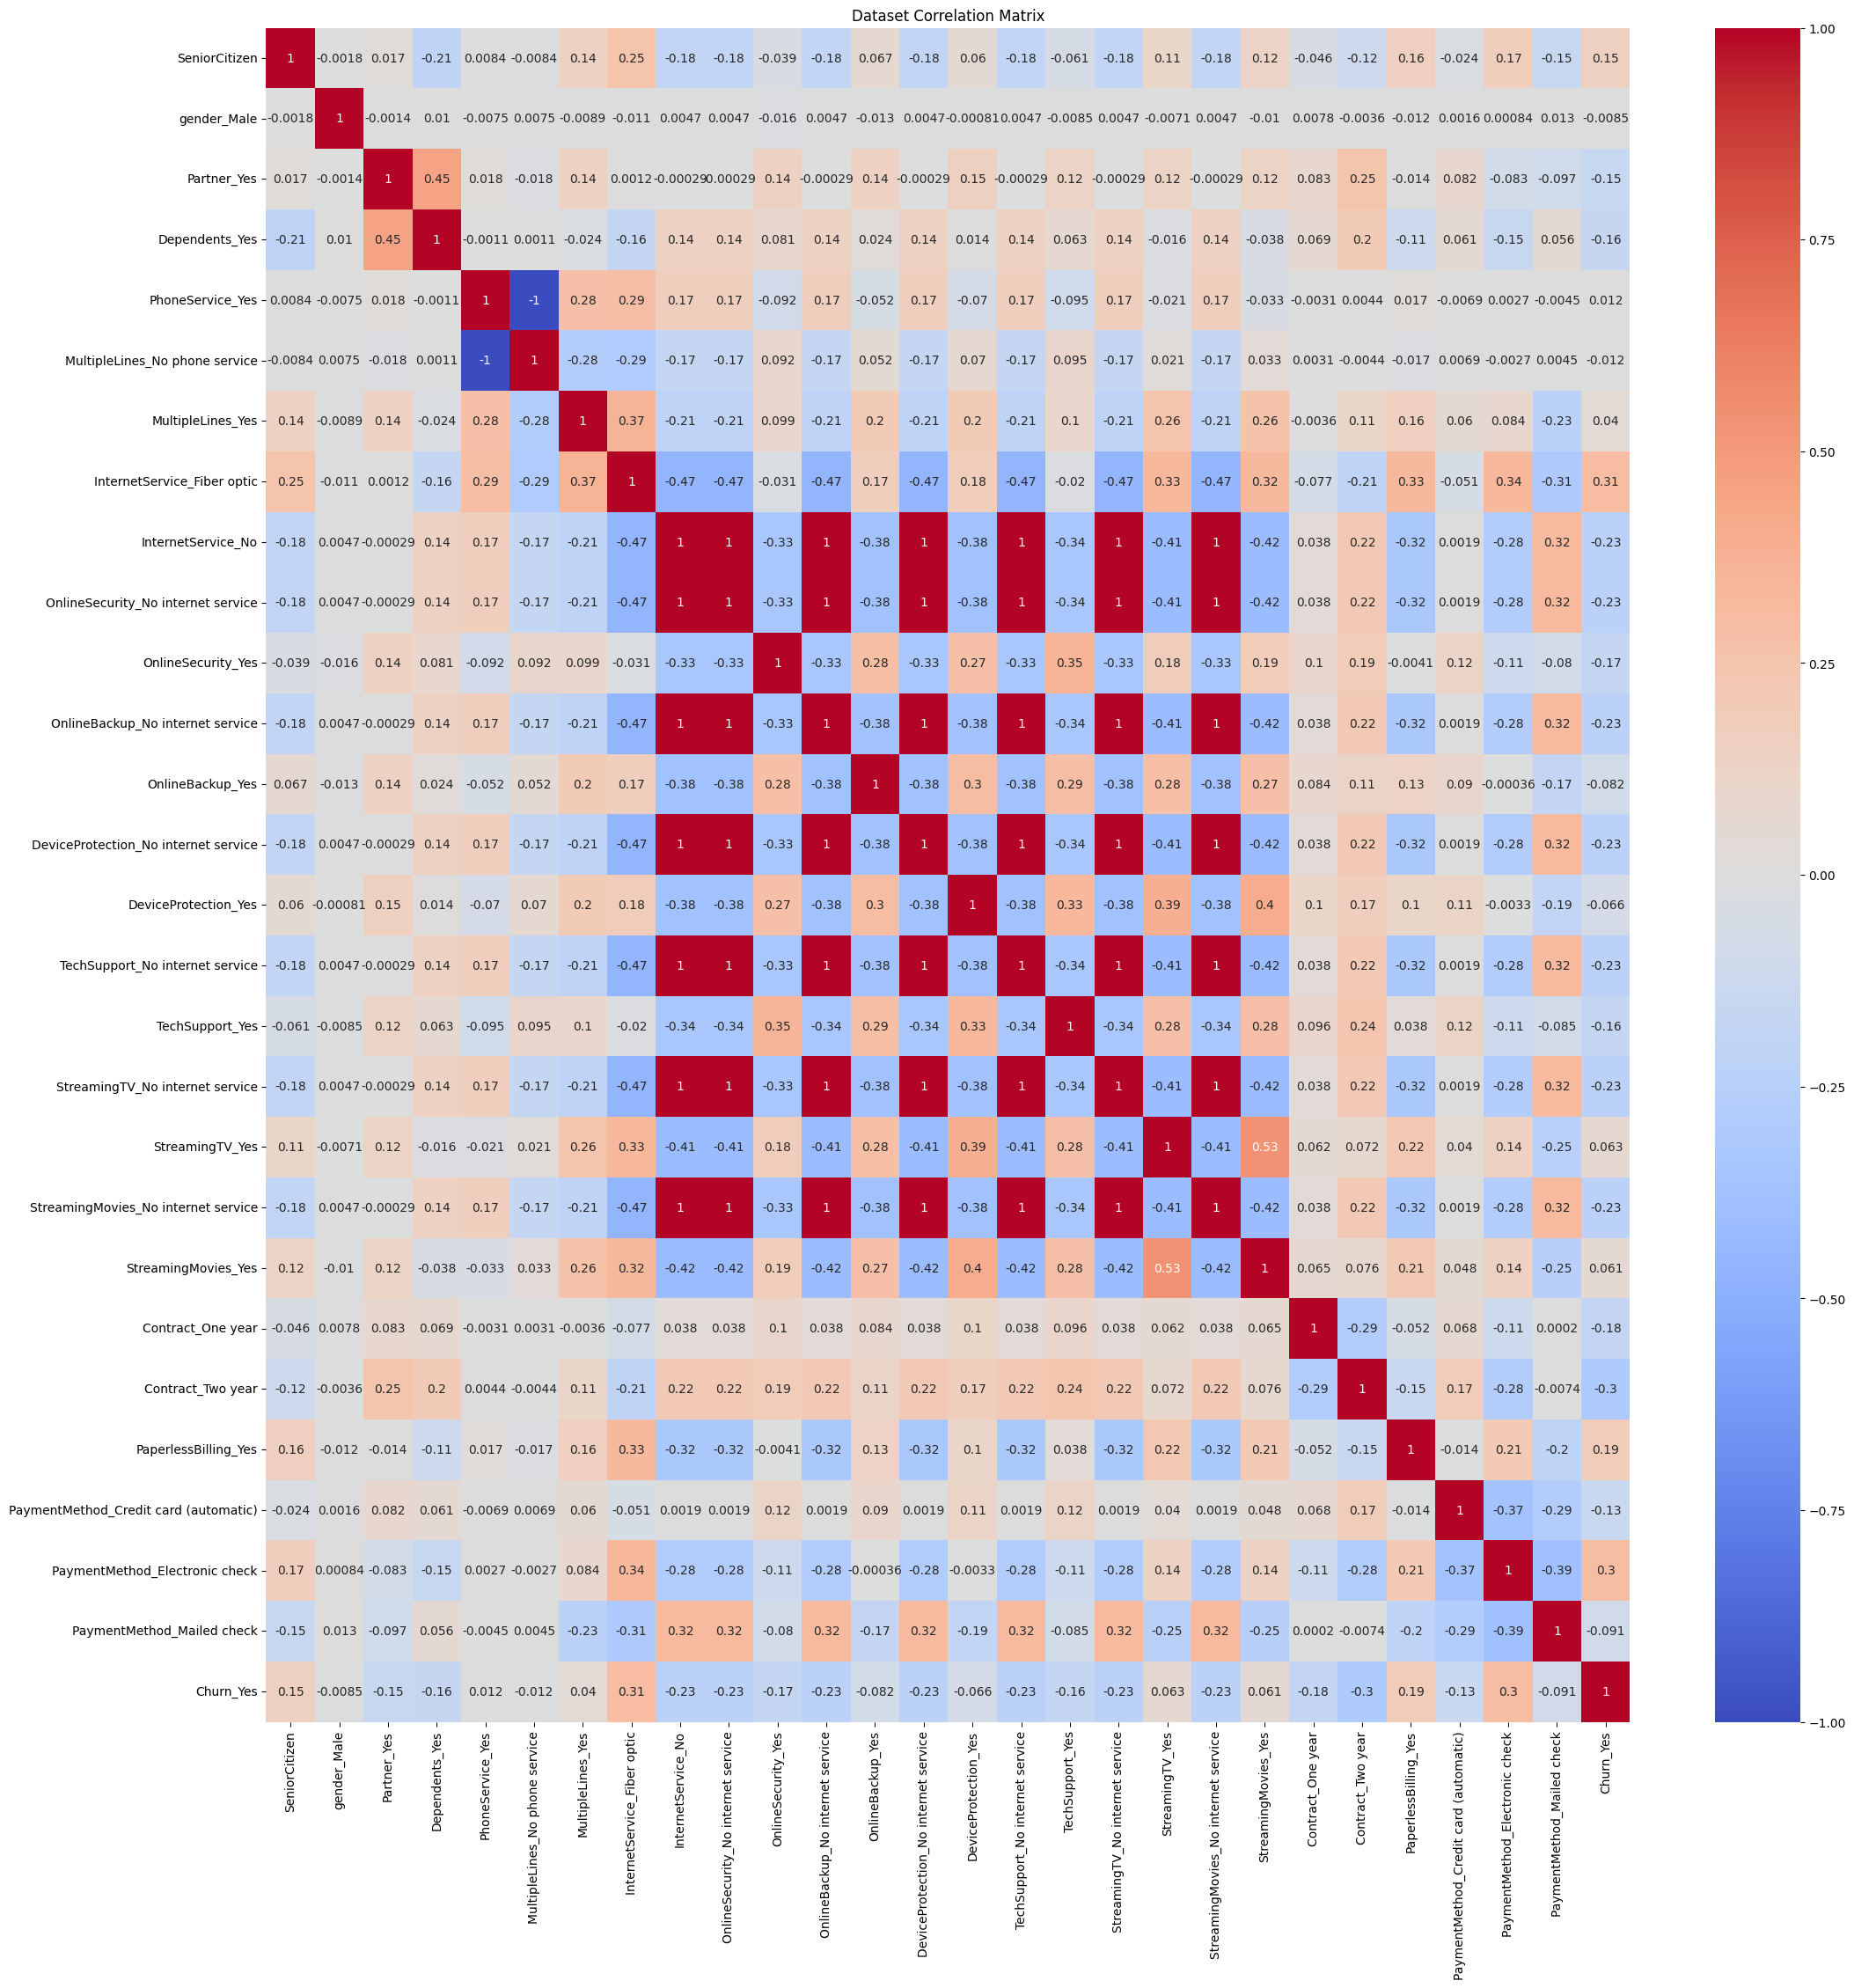

In [14]:
plt.figure(figsize=(25,25))
plt.title('Dataset Correlation Matrix')
sns.heatmap(telco_df_numeric.corr(), annot=True, cmap='coolwarm')
plt.savefig('assets/telco-customer-churn_04.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_04.webp)

In [15]:
# correlation to label class
telco_df_numeric.corr(numeric_only=True)['Churn_Yes']

SeniorCitizen                            0.150541
gender_Male                             -0.008545
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
PhoneService_Yes                         0.011691
MultipleLines_No phone service          -0.011691
MultipleLines_Yes                        0.040033
InternetService_Fiber optic              0.307463
InternetService_No                      -0.227578
OnlineSecurity_No internet service      -0.227578
OnlineSecurity_Yes                      -0.171270
OnlineBackup_No internet service        -0.227578
OnlineBackup_Yes                        -0.082307
DeviceProtection_No internet service    -0.227578
DeviceProtection_Yes                    -0.066193
TechSupport_No internet service         -0.227578
TechSupport_Yes                         -0.164716
StreamingTV_No internet service         -0.227578
StreamingTV_Yes                          0.063254
StreamingMovies_No internet service     -0.227578


| | |
| -- | -- |
| SeniorCitizen | 0.150541 |
| gender_Male | -0.008545 |
| Partner_Yes | -0.149982 |
| Dependents_Yes | -0.163128 |
| PhoneService_Yes | 0.011691 |
| MultipleLines_No phone service | - | .011691 |
| MultipleLines_Yes | 0.040033 |
| InternetService_Fiber optic | 0.307463 |
| InternetService_No | -0.227578 |
| OnlineSecurity_No internet service | -0.227578 |
| OnlineSecurity_Yes | -0.171270 |
| OnlineBackup_No internet service | -0.227578 |
| OnlineBackup_Yes | -0.082307 |
| DeviceProtection_No internet service | -0.227578 |
| DeviceProtection_Yes | -0.066193 |
| TechSupport_No internet service | -0.227578 |
| TechSupport_Yes | -0.164716 |
| StreamingTV_No internet service | -0.227578 |
| StreamingTV_Yes | 0.063254 |
| StreamingMovies_No internet service | -0.227578 |
| StreamingMovies_Yes | 0.060860 |
| Contract_One year | -0.178225 |
| Contract_Two year | -0.301552 |
| PaperlessBilling_Yes | 0.191454 |
| PaymentMethod_Credit card (automatic | -0.134687 |
| PaymentMethod_Electronic check | 0.301455 |
| PaymentMethod_Mailed check | -0.090773 |
| Churn_Yes | 1.000000 |
_Name: Churn\_Yes, dtype: float64_

In [25]:
# create correlation dataframe
telco_df_numeric_corr = telco_df_numeric.corr(numeric_only=True)['Churn_Yes'][:-2].sort_values()

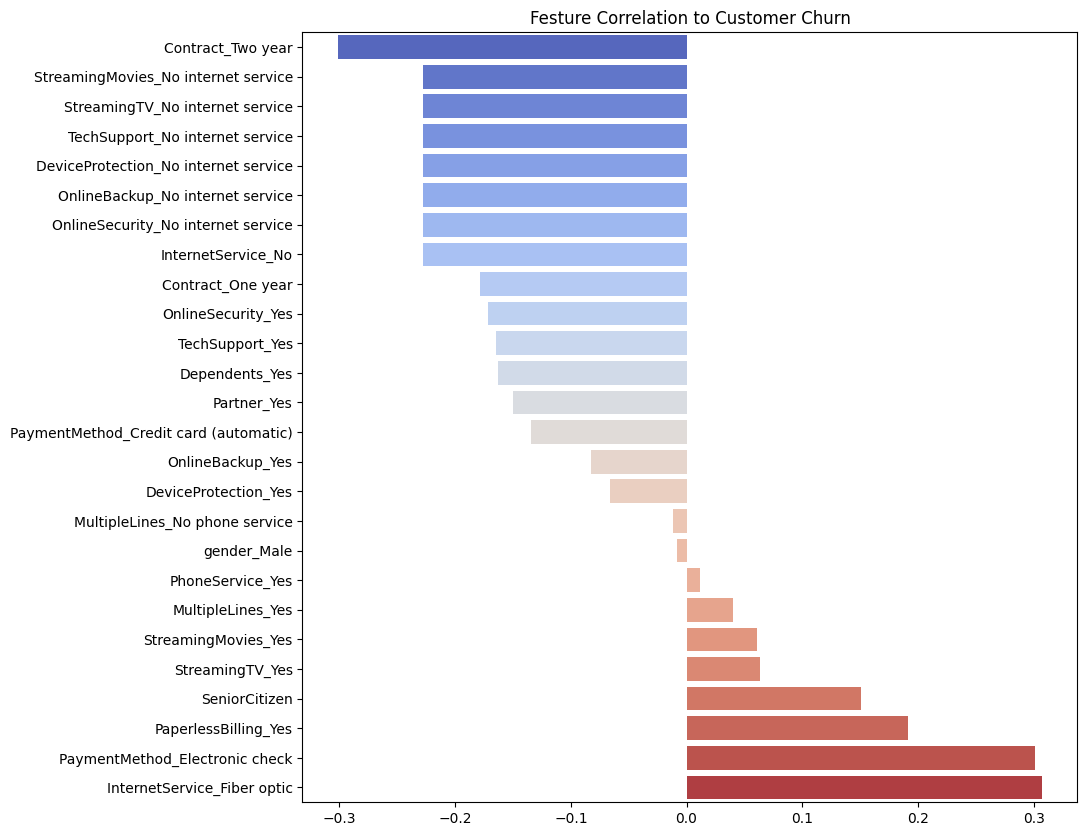

In [33]:
plt.figure(figsize=(10, 10))
plt.title('Festure Correlation to Customer Churn')

sns.barplot(
    y=telco_df_numeric_corr.index,
    x=telco_df_numeric_corr.values,
    estimator='mean',
    errorbar=None,
    palette='coolwarm',
    orient='h'
)

plt.savefig('assets/telco-customer-churn_05.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_05.webp)

### Churn Analaysis

In [34]:
# segmenting customers based on their tenure
telco_df['Contract'].value_counts()

# Month-to-month    3875
# Two year          1685
# One year          1472
# Name: Contract, dtype: int64

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

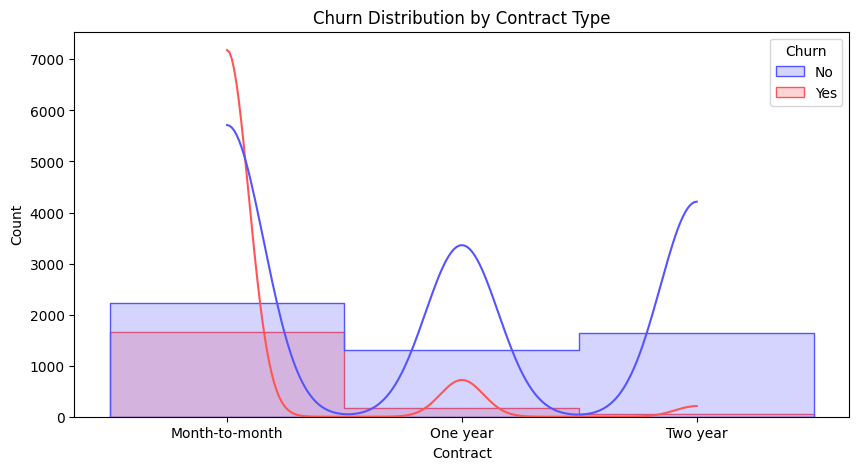

In [39]:
plt.figure(figsize=(10, 5))
plt.title('Churn Distribution by Contract Type')

sns.histplot(
    data=telco_df,
    x='Contract',
    hue='Churn',
    element='step',
    palette='seismic',
    kde=True
)

plt.savefig('assets/telco-customer-churn_06.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_06.webp)

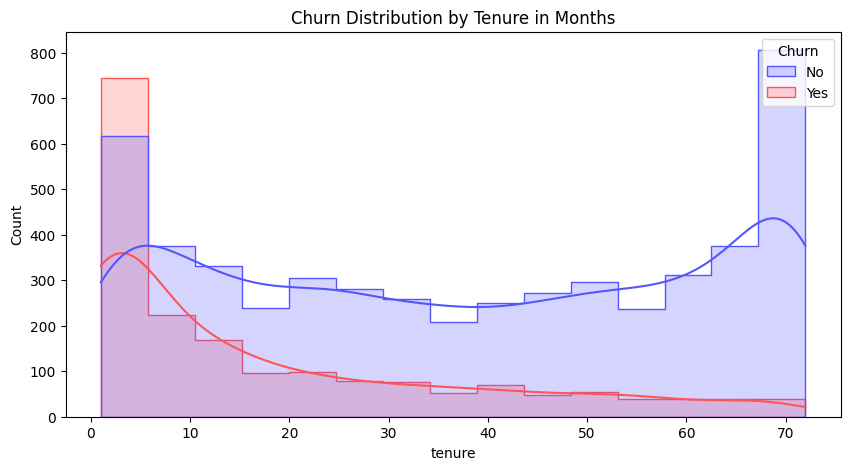

In [43]:
plt.figure(figsize=(10, 5))
plt.title('Churn Distribution by Tenure in Months')

sns.histplot(
    data=telco_df,
    x='tenure',
    hue='Churn',
    element='step',
    palette='seismic',
    kde=True
)

plt.savefig('assets/telco-customer-churn_07.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_07.webp)

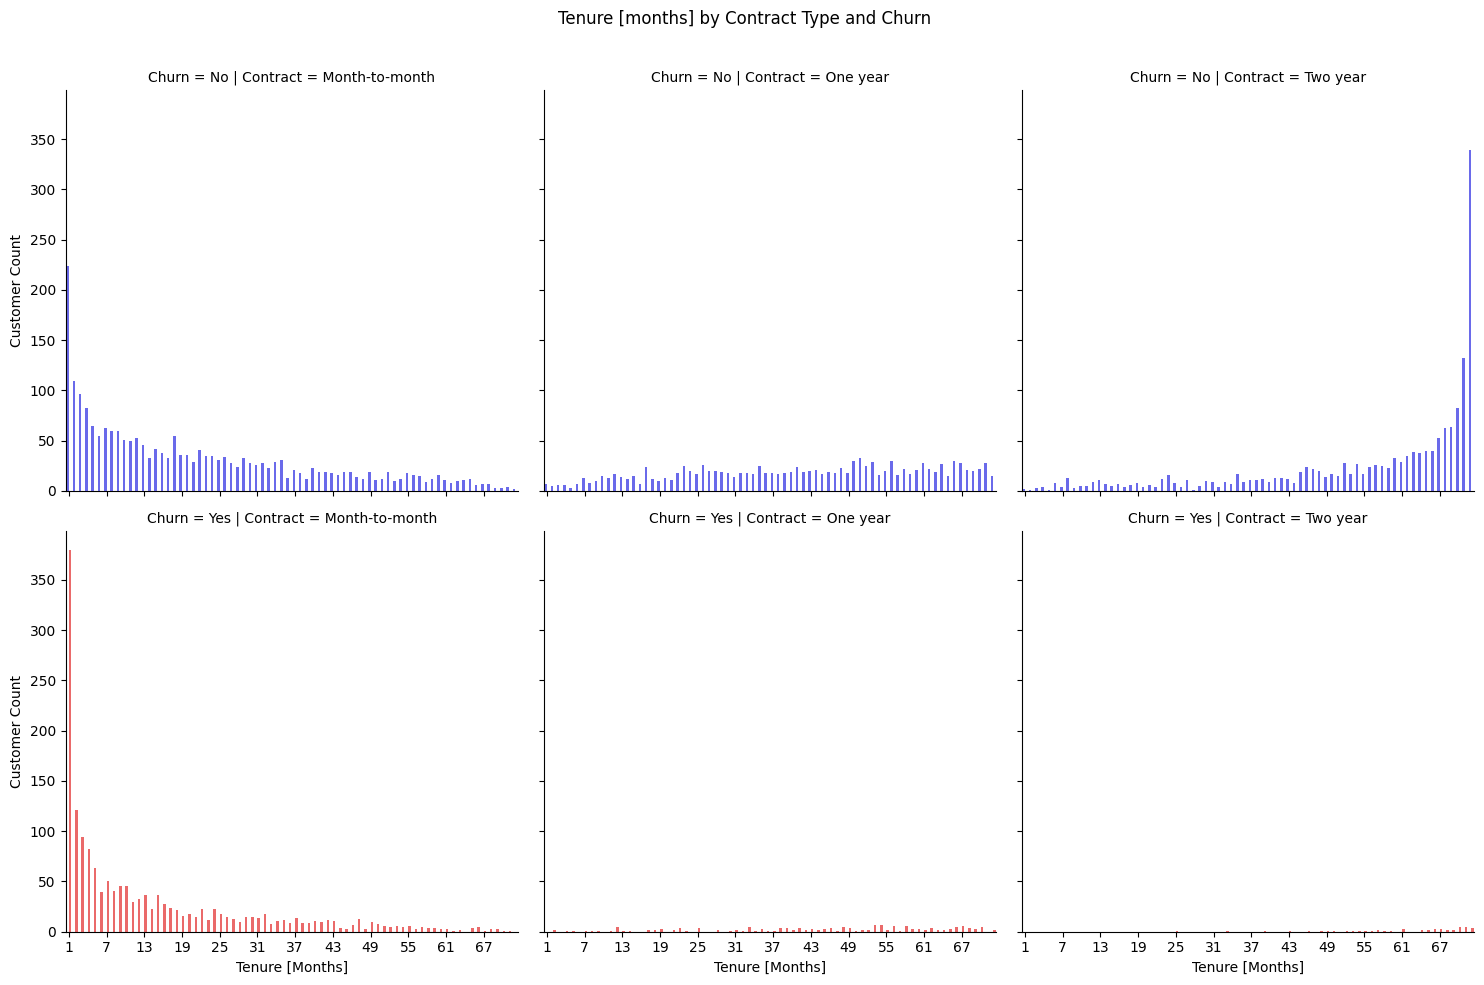

In [58]:
grid = sns.catplot(
    data=telco_df,
    x='tenure',
    kind='count',
    hue='Churn',
    palette='seismic',
    col='Contract',
    row='Churn'
)

grid.set(
    xticks=np.arange(0,72,6),
    xlabel='Tenure [Months]',
    ylabel='Customer Count'
)

grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Tenure [months] by Contract Type and Churn')

plt.savefig('assets/telco-customer-churn_08.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_08.webp)

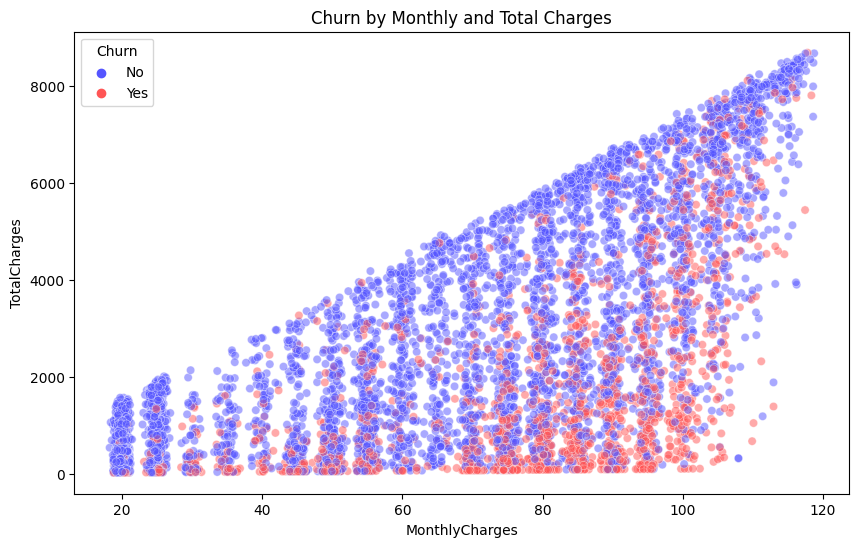

In [63]:
plt.figure(figsize=(10, 6))

plot = sns.scatterplot(
    x='MonthlyCharges',
    y='TotalCharges',
    data=telco_df,
    hue='Churn',
    palette='seismic',
    alpha=0.5
)

plot.set_title('Churn by Monthly and Total Charges')

plt.savefig('assets/telco-customer-churn_09.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_09.webp)

#### Tenure Cohort Study

In [8]:
# group customers by tenure and calculate average monthly charges
telco_df_tenure = telco_df.groupby('tenure').mean(numeric_only=True)['MonthlyCharges']

| tenure | MonthlyCharges |
| -- | -- |
| 1  | 50.485808 |
| 2  | 57.206303 |
| 3  | 58.015000 |
| 4  | 57.432670 |
| 5  | 61.003759 |
|        ...     |
| 68 | 73.321000 |
| 69 | 70.823158 |
| 70 | 76.378992 |
| 71 | 73.735588 |
| 72 | 80.695856 |
_Name: MonthlyCharges, Length: 72, dtype: float64_

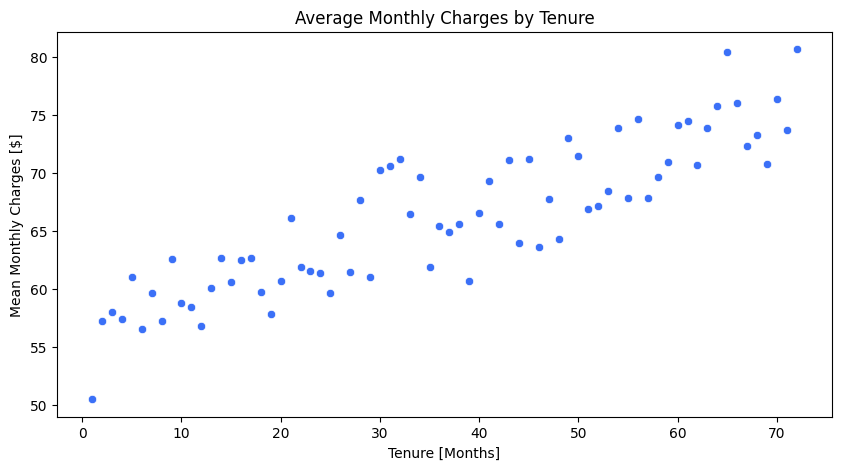

In [38]:
plt.figure(figsize=(10, 5))
plt.title('Average Monthly Charges by Tenure')
plt.xlabel('Tenure [Months]')
plt.ylabel('Mean Monthly Charges [$]')

sns.scatterplot(
    x=telco_df_tenure.index,
    y=telco_df_tenure.values,
    color='#3b70f7'
)

plt.savefig('assets/telco-customer-churn_10.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_10.webp)

In [41]:
# adding missing columns
telco_df_numeric['Tenure'] = telco_df['tenure']
telco_df_numeric['Monthly Charges'] = telco_df['MonthlyCharges']
telco_df_numeric['Total Charges'] = telco_df['TotalCharges']
telco_df_numeric['Contract'] = telco_df['Contract']
telco_df_numeric[['Tenure', 'Churn_Yes']]

,Tenure,Churn_Yes
0,1,0
1,34,0
2,2,1
3,45,0
4,2,1
...,...,...
7038,24,0
7039,72,0
7040,11,0
7041,4,1


|    | Tenure | Churn_Yes |
| -- | -- | -- |
| 0 | 1 | 0 |
| 1 | 34 | 0 |
| 2 | 2 | 1 |
| 3 | 45 | 0 |
| 4 | 2 | 1 |
| ... |
| 7038 | 24 | 0 |
| 7039 | 72 | 0 |
| 7040 | 11 | 0 |
| 7041 | 4 | 1 |
| 7042 | 66 | 0 |
_7032 rows × 2 columns_

In [27]:
# group customers by tenure and calculate average churn rate
telco_df_tenure_Churn = telco_df_numeric.groupby('Tenure').mean(numeric_only=True)['Churn_Yes']

| Tenure | Average Churn Rate |
| -- | -- |
| 1  | 0.619902 |
| 2  | 0.516807 |
| 3  | 0.470000 |
| 4  | 0.471591 |
| 5  | 0.481203 |
| ... |
| 68 | 0.090000 |
| 69 | 0.084211 |
| 70 | 0.092437 |
| 71 | 0.035294 |
| 72 | 0.016575 |
_Name: Churn\_Yes, Length: 72, dtype: float64_

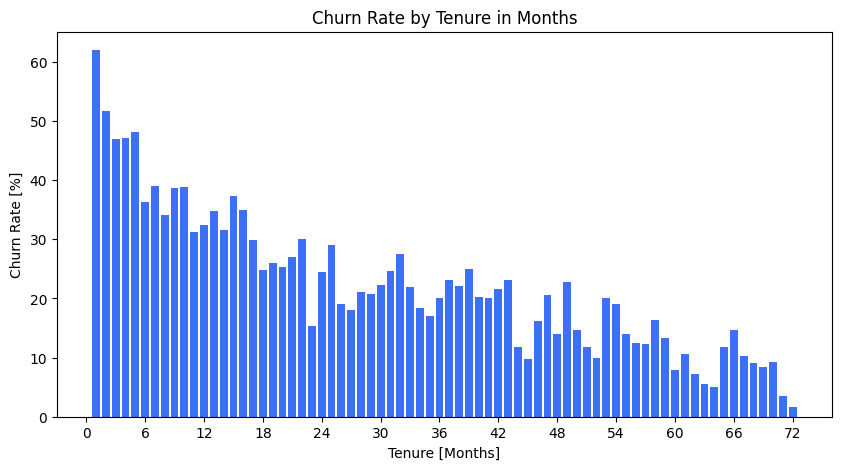

In [37]:
fig, ax = plt.subplots(
    figsize=(10,5)
)
ax.bar(
    x=telco_df_tenure_Churn.index,
    height=telco_df_tenure_Churn.values.round(4)*100,
    color='#3b70f7'
)
ax.set_title('Churn Rate by Tenure in Months')
ax.set(
    xlabel='Tenure [Months]',
    ylabel='Churn Rate [%]',
    xticks=np.arange(0,78,6)
)

fig.savefig('assets/telco-customer-churn_11.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_11.webp)

In [18]:
# group customers in chorts 0-12,12-24,24-48 and above 48 months tenure
def tenure_cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'
        

In [19]:
telco_df_numeric['Tenure Cohort'] = telco_df_numeric['Tenure'].apply(tenure_cohort)
telco_df_numeric[['Tenure','Tenure Cohort']]

,Tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7038,24,12-24 Months
7039,72,Over 48 Months
7040,11,0-12 Months
7041,4,0-12 Months


|    | Tenure | Tenure Cohort |
| -- | -- | -- |
| 0 | 1 | 0-12 Months |
| 1 | 34 | 24-48 Months |
| 2 | 2 | 0-12 Months |
| 3 | 45 | 24-48 Months |
| 4 | 2 | 0-12 Months |
| ... |
| 7038 | 24 | 12-24 Months |
| 7039 | 72 | Over 48 Months |
| 7040 | 11 | 0-12 Months |
| 7041 | 4 | 0-12 Months |
| 7042 | 66 | Over 48 Months |
_7032 rows × 2 columns_

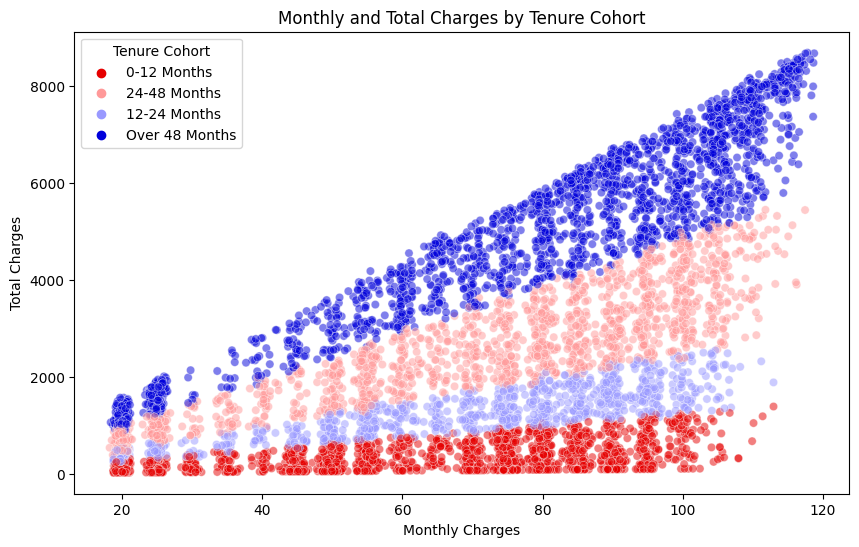

In [30]:
plt.figure(figsize=(10, 6))

plot = sns.scatterplot(
    x='Monthly Charges',
    y='Total Charges',
    data=telco_df_numeric,
    hue='Tenure Cohort',
    palette='seismic_r',
    alpha=0.5
)

plot.set_title('Monthly and Total Charges by Tenure Cohort')

plt.savefig('assets/telco-customer-churn_12.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_12.webp)

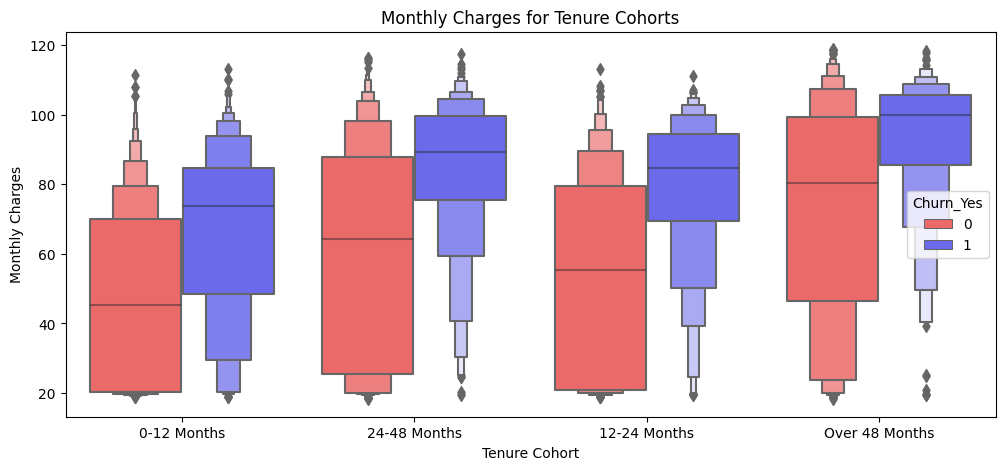

In [33]:
plt.figure(figsize=(12, 5))
plt.title('Monthly Charges for Tenure Cohorts')

sns.boxenplot(
    data=telco_df_numeric,
    x='Tenure Cohort',
    y='Monthly Charges',
    hue='Churn_Yes',
    palette='seismic_r'
)
plt.savefig('assets/telco-customer-churn_13.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_13.webp)

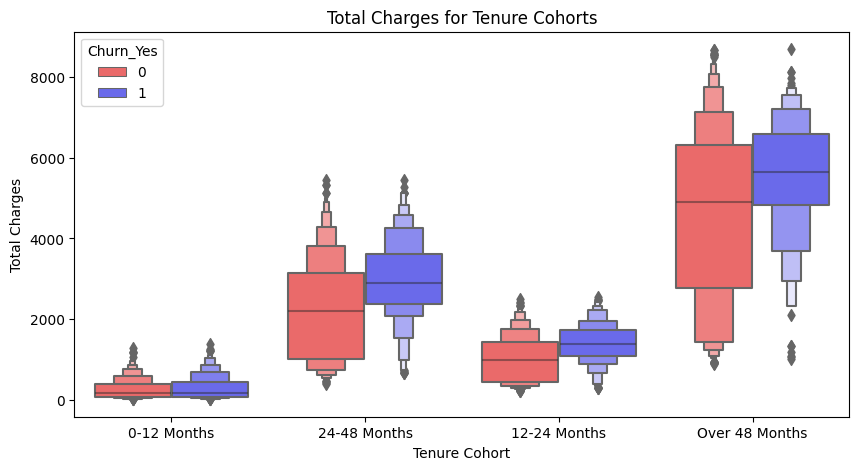

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Total Charges for Tenure Cohorts')

sns.boxenplot(
    data=telco_df_numeric,
    x='Tenure Cohort',
    y='Total Charges',
    hue='Churn_Yes',
    palette='seismic_r'
)
plt.savefig('assets/telco-customer-churn_14.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_14.webp)

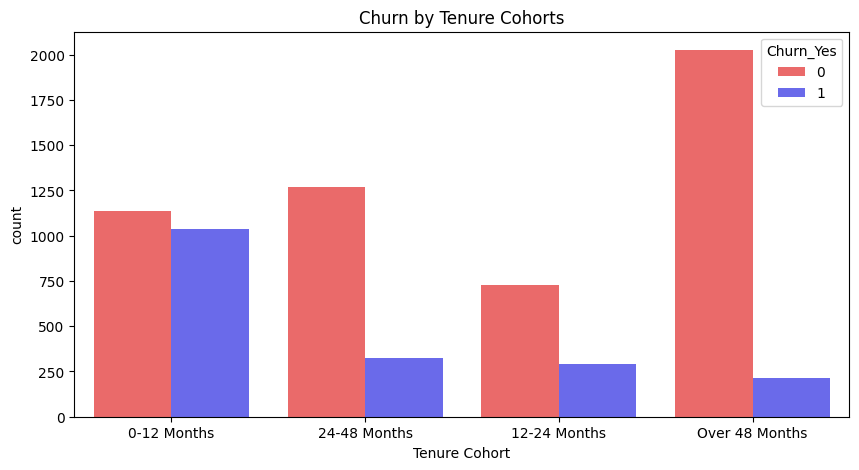

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Churn by Tenure Cohorts')

sns.countplot(
    data=telco_df_numeric,
    x='Tenure Cohort',
    hue='Churn_Yes',
    palette='seismic_r'
)
plt.savefig('assets/telco-customer-churn_15.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_15.webp)

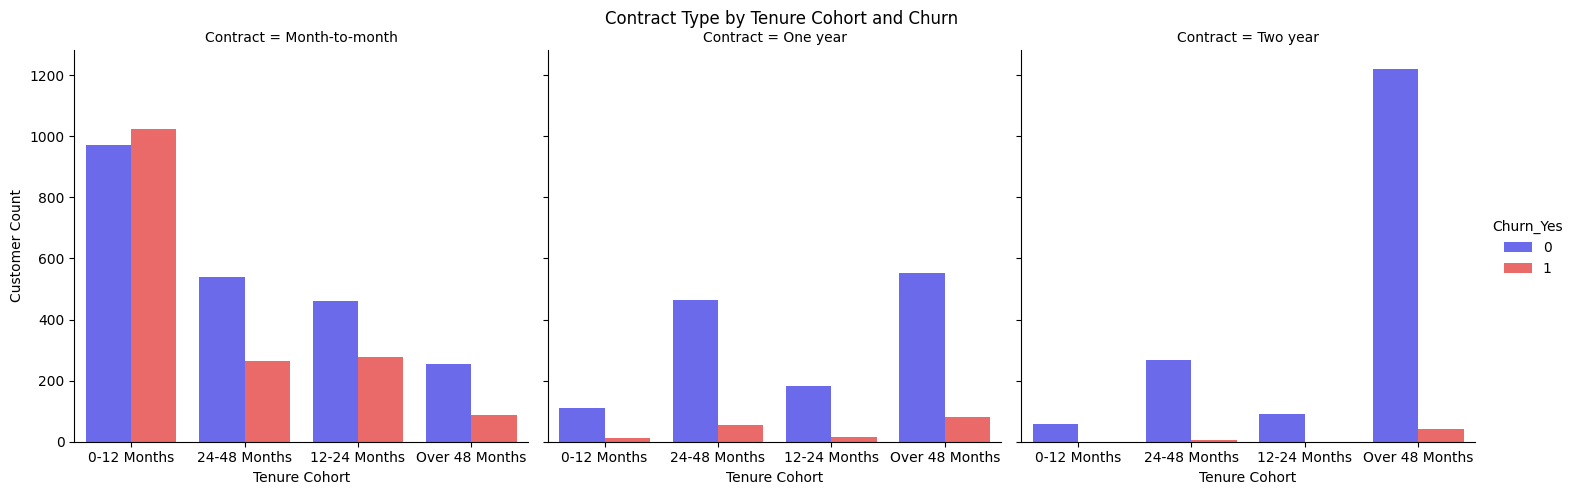

In [42]:
grid = sns.catplot(
    data=telco_df_numeric,
    x='Tenure Cohort',
    kind='count',
    hue='Churn_Yes',
    palette='seismic',
    col='Contract'
)

grid.set(
    # xticks=np.arange(0,72,6),
    xlabel='Tenure Cohort',
    ylabel='Customer Count'
)

grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Contract Type by Tenure Cohort and Churn')

plt.savefig('assets/telco-customer-churn_16.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_16.webp)

### Predictive Modeling

#### Single Decision Tree

Baseline single tree classifier with default hyper parameters.

In [54]:
# remove target feature and non-numeric columns from training set
X_churn = telco_df_numeric.drop(['Churn_Yes','Tenure Cohort', 'Contract'], axis=1)
y_churn = telco_df_numeric['Churn_Yes']

In [55]:
# train/test split
X_churn_train, X_churn_test, y_churn_train, y_churn_test = train_test_split(
    X_churn,
    y_churn,
    test_size=0.2
)

In [56]:
# fit the model
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_churn_train, y_churn_train)

DecisionTreeClassifier()

In [69]:
# run predictions
y_tree_preds = tree_classifier.predict(X_churn_test)

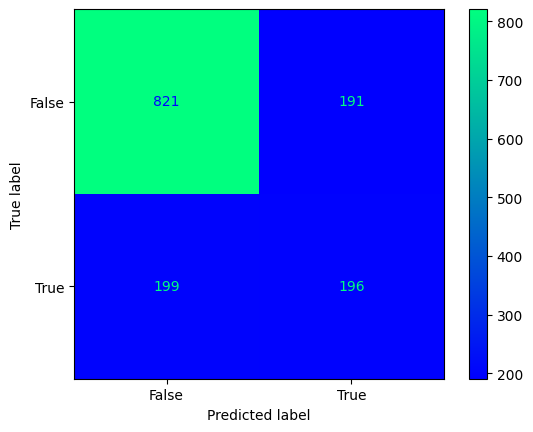

In [70]:
# evaluate predictions
conf_mtx_tree = confusion_matrix(y_churn_test, y_tree_preds)

conf_mtx_tree_plot = ConfusionMatrixDisplay(
    confusion_matrix=conf_mtx_tree,
    display_labels=[False,True]
)

conf_mtx_tree_plot.plot(cmap='winter')

plt.savefig('assets/telco-customer-churn_17.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_17.webp)

In [71]:
report_tree = classification_report(
    y_churn_test, y_tree_preds
)
print(report_tree)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1012
           1       0.51      0.50      0.50       395

    accuracy                           0.72      1407
   macro avg       0.66      0.65      0.65      1407
weighted avg       0.72      0.72      0.72      1407



|        | precision | recall | f1-score | support |
| --     | --    | --   | --   | --   |
|      0 |  0.80 | 0.81 | 0.81 | 1012 |
|      1 |  0.51 | 0.50 | 0.50 |  395 |
| accuracy |   |      | 0.72 | 1407 |
| macro avg |  0.66 | 0.65 | 0.65 | 1407 |
| weighted avg |  0.72 | 0.72 | 0.72 | 1407 |

In [80]:
# feature importance for classification
tree_index = ['importance']
tree_data_columns = pd.Series(X_churn.columns)
tree_importance_array = tree_classifier.feature_importances_
tree_importance_df = pd.DataFrame(tree_importance_array, tree_data_columns, tree_index)
tree_importance_df

,importance
SeniorCitizen,0.019747
gender_Male,0.022160
Partner_Yes,0.018070
Dependents_Yes,0.016844
PhoneService_Yes,0.002513
MultipleLines_No phone service,0.001701
MultipleLines_Yes,0.015637
InternetService_Fiber optic,0.106278
InternetService_No,0.000000
OnlineSecurity_No internet service,0.000000


| | importance |
| -- | -- |
| SeniorCitizen | 0.019747 |
| gender_Male | 0.022160 |
| Partner_Yes | 0.018070 |
| Dependents_Yes | 0.016844 |
| PhoneService_Yes | 0.002513 |
| MultipleLines_No phone service | 0.001701 |
| MultipleLines_Yes | 0.015637 |
| InternetService_Fiber optic | 0.106278 |
| InternetService_No | 0.000000 |
| OnlineSecurity_No internet service | 0.000000 |
| OnlineSecurity_Yes | 0.015796 |
| OnlineBackup_No internet service | 0.000000 |
| OnlineBackup_Yes | 0.015036 |
| DeviceProtection_No internet service | 0.000000 |
| DeviceProtection_Yes | 0.013911 |
| TechSupport_No internet service | 0.004314 |
| TechSupport_Yes | 0.023056 |
| StreamingTV_No internet service | 0.006463 |
| StreamingTV_Yes | 0.012094 |
| StreamingMovies_No internet service | 0.000000 |
| StreamingMovies_Yes | 0.010126 |
| Contract_One year | 0.008873 |
| Contract_Two year | 0.007519 |
| PaperlessBilling_Yes | 0.023079 |
| PaymentMethod_Credit card (automatic) | 0.010816 |
| PaymentMethod_Electronic check | 0.022332 |
| PaymentMethod_Mailed check | 0.009718 |
| Tenure | 0.192801 |
| MonthlyCharges | 0.085796 |
| TotalCharges | 0.121363 |
| Monthly Charges | 0.114721 |
| Total Charges | 0.099236 |

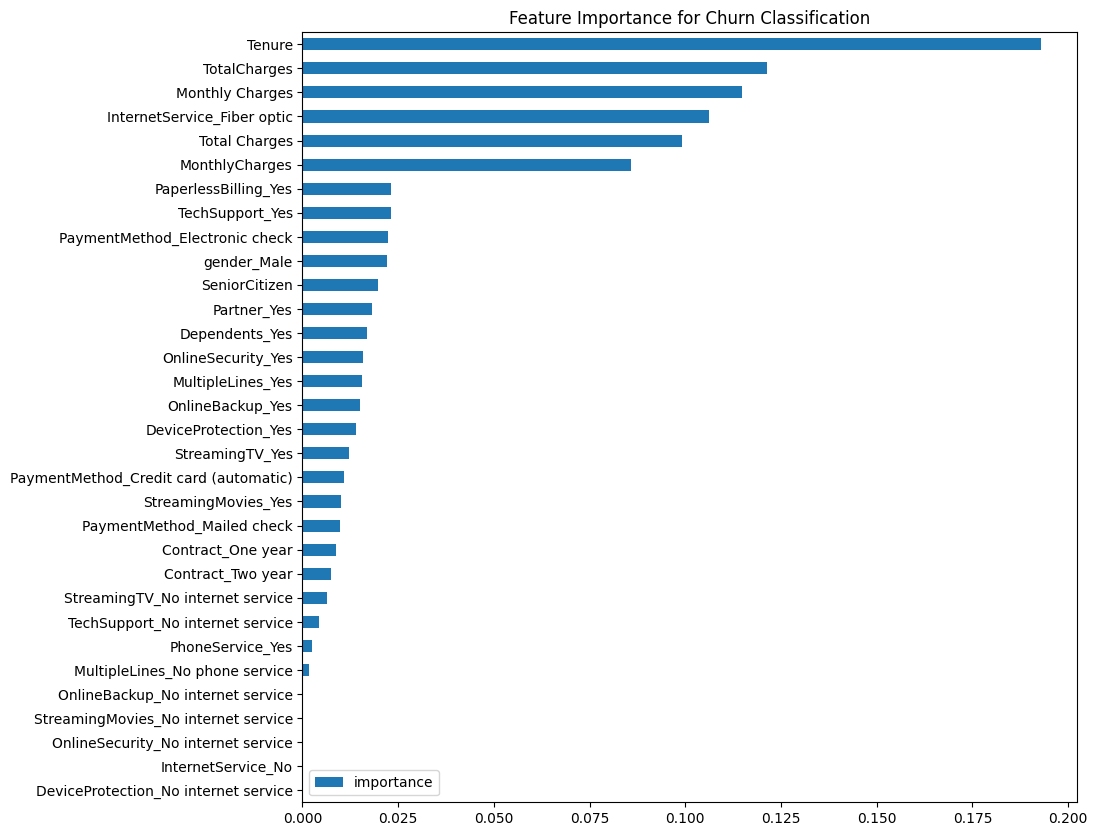

In [84]:
tree_importance_df.sort_values(
    by='importance',
    ascending=True
).plot(
    kind='barh',
    title='Feature Importance for Churn Classification',
    figsize=(10,10)
)

plt.savefig('assets/telco-customer-churn_18.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_18.webp)

#### Random Forest
Random forest with grid search for optimal hyper parameter.

In [85]:
rdnfor_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [5, 25, 50, 75,100, 125],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1,2,3],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

grid_search_rdnfor = GridSearchCV(
    estimator = rdnfor_classifier,
    param_grid = param_grid
)

grid_search_rdnfor.fit(X_churn_train, y_churn_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [5, 25, 50, 75, 100, 125]})

In [86]:
print('Best Parameter: ', grid_search_rdnfor.best_params_)
# Best Parameter:  {'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 125}

Best Parameter:  {'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 125}


In [88]:
# run predictions
y_rdnfor_preds = grid_search_rdnfor.predict(X_churn_test)

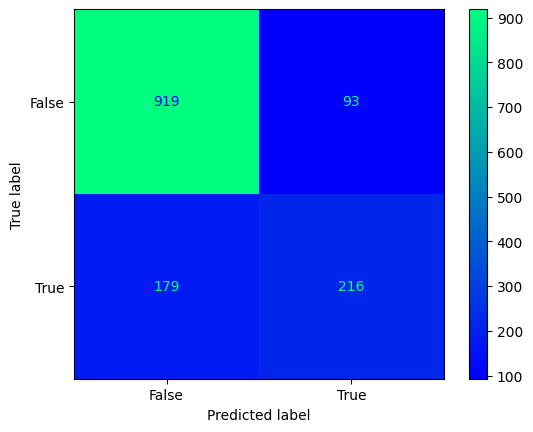

In [89]:
# evaluate predictions
conf_mtx_rdnfor = confusion_matrix(y_churn_test, y_rdnfor_preds)

conf_mtx_rdnfor_plot = ConfusionMatrixDisplay(
    confusion_matrix=conf_mtx_rdnfor,
    display_labels=[False,True]
)

conf_mtx_rdnfor_plot.plot(cmap='winter')

plt.savefig('assets/telco-customer-churn_19.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_19.webp)

In [90]:
report_rdnfor = classification_report(
    y_churn_test, y_rdnfor_preds
)
print(report_rdnfor)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1012
           1       0.70      0.55      0.61       395

    accuracy                           0.81      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



|        | precision | recall | f1-score | support |
| --     | --    | --   | --   | --   |
|      0 |  0.84 | 0.91 | 0.87 | 1012 |
|      1 |  0.70 | 0.55 | 0.61 |  395 |
| accuracy |   |      | 0.81 | 1407 |
| macro avg |  0.77 | 0.73 | 0.74 | 1407 |
| weighted avg |  0.80 | 0.81 | 0.80 | 1407 |

#### Adaptive Boosting
Baseline AdaBoost classifier with default hyper parameters.

In [93]:
abc_classifier = AdaBoostClassifier(
    estimator=None,
    n_estimators=50,
    learning_rate=1.0
)

abc_classifier.fit(X_churn_train, y_churn_train)

abc_classifier_preds = abc_classifier.predict(X_churn_test)

In [94]:
# run predictions
y_abc_preds = abc_classifier.predict(X_churn_test)

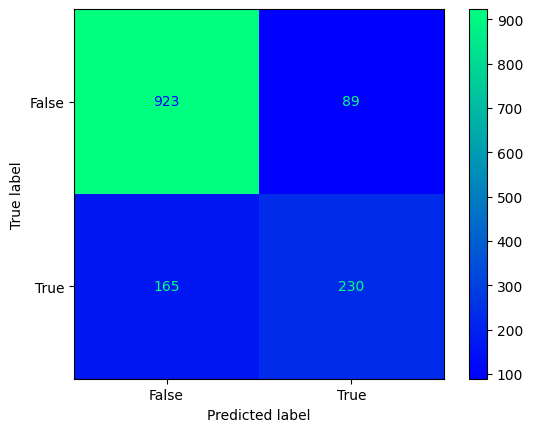

In [95]:
# evaluate predictions
conf_mtx_abc = confusion_matrix(y_churn_test, y_abc_preds)

conf_mtx_abc_plot = ConfusionMatrixDisplay(
    confusion_matrix=conf_mtx_abc,
    display_labels=[False,True]
)

conf_mtx_abc_plot.plot(cmap='winter')

plt.savefig('assets/telco-customer-churn_21.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_21.webp)

In [97]:
report_abc = classification_report(
    y_churn_test, y_abc_preds
)
print(report_abc)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1012
           1       0.72      0.58      0.64       395

    accuracy                           0.82      1407
   macro avg       0.78      0.75      0.76      1407
weighted avg       0.81      0.82      0.81      1407



|        | precision | recall | f1-score | support |
| --     | --    | --   | --   | --   |
|      0 |  0.85 | 0.91 | 0.88 | 1012 |
|      1 |  0.72 | 0.58 | 0.64 |  395 |
| accuracy |   |      | 0.82 | 1407 |
| macro avg |  0.78 | 0.75 | 0.76 | 1407 |
| weighted avg |  0.81 | 0.82 | 0.81 | 1407 |

In [100]:
# feature importance for classification
abc_index = ['importance']
abc_data_columns = pd.Series(X_churn.columns)
abc_importance_array = abc_classifier.feature_importances_
abc_importance_df = pd.DataFrame(abc_importance_array, abc_data_columns, abc_index)
abc_importance_df

,importance
SeniorCitizen,0.02
gender_Male,0.02
Partner_Yes,0.00
Dependents_Yes,0.00
PhoneService_Yes,0.00
MultipleLines_No phone service,0.00
MultipleLines_Yes,0.04
InternetService_Fiber optic,0.06
InternetService_No,0.00
OnlineSecurity_No internet service,0.00


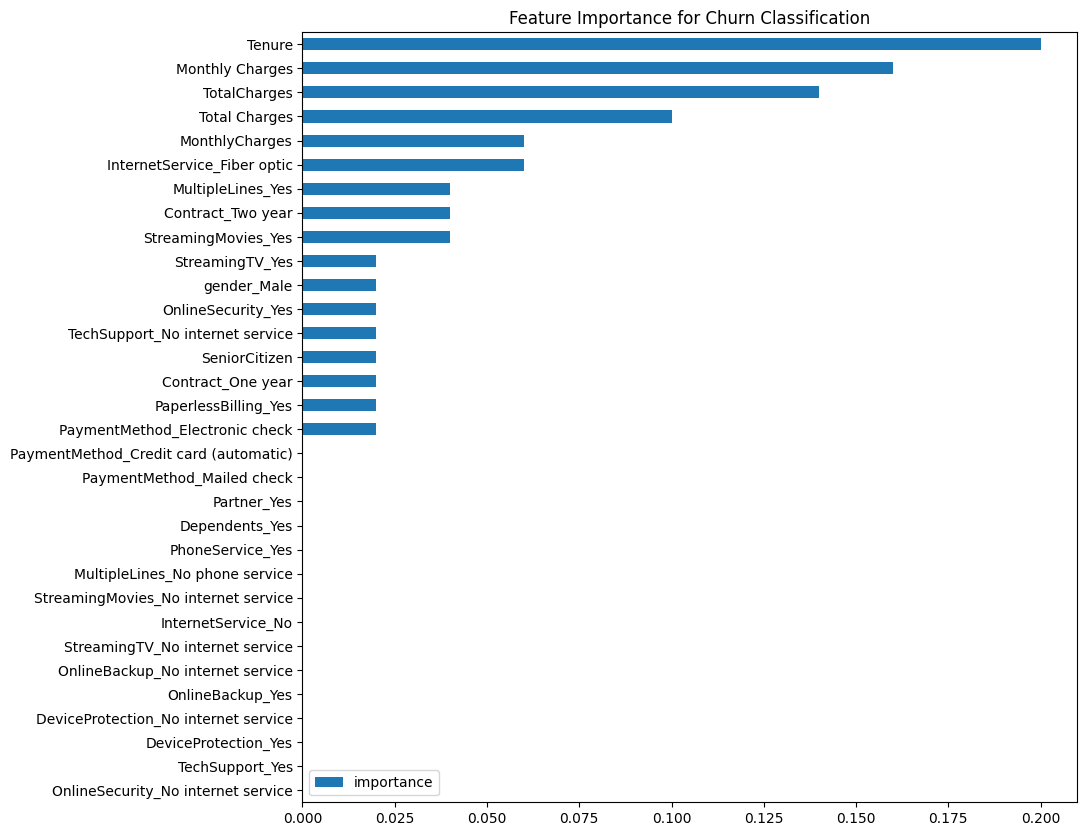

In [101]:
abc_importance_df.sort_values(
    by='importance',
    ascending=True
).plot(
    kind='barh',
    title='Feature Importance for Churn Classification',
    figsize=(10,10)
)

plt.savefig('assets/telco-customer-churn_22.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_22.webp)

#### Gradient Boosting
GradientBoost Classifier with grid search for optimal hyper parameter.

In [102]:
gb_classifier = GradientBoostingClassifier()

In [103]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05,0.1,0.2],
    'max_depth': [2,3,4,5]
}

In [104]:
grid_search_gb = GridSearchCV(gb_classifier, param_grid)
grid_search_gb.fit(X_churn_train, y_churn_train)
grid_search_gb.best_params_
# {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [106]:
# run predictions
y_gb_preds = grid_search_gb.predict(X_churn_test)

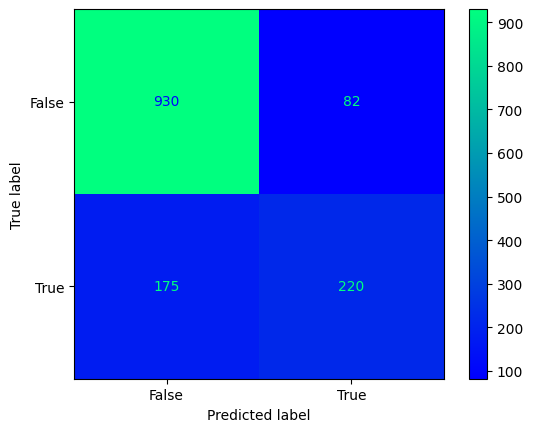

In [107]:
# evaluate predictions
conf_mtx_gb = confusion_matrix(y_churn_test, y_gb_preds)

conf_mtx_gb_plot = ConfusionMatrixDisplay(
    confusion_matrix=conf_mtx_gb,
    display_labels=[False,True]
)

conf_mtx_gb_plot.plot(cmap='winter')

plt.savefig('assets/telco-customer-churn_23.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_23.webp)

In [108]:
report_gb = classification_report(
    y_churn_test, y_gb_preds
)
print(report_gb)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1012
           1       0.73      0.56      0.63       395

    accuracy                           0.82      1407
   macro avg       0.79      0.74      0.75      1407
weighted avg       0.81      0.82      0.81      1407



|        | precision | recall | f1-score | support |
| --     | --    | --   | --   | --   |
|      0 |  0.84 | 0.92 | 0.88 | 1012 |
|      1 |  0.73 | 0.56 | 0.63 |  395 |
| accuracy |   |      | 0.82 | 1407 |
| macro avg |  0.79 | 0.74 | 0.75 | 1407 |
| weighted avg |  0.81 | 0.82 | 0.81 | 1407 |

#### Support Vector Classifier

In [111]:
# normalize feature values
sc_churn = StandardScaler()
X_churn_train_scaled=sc_churn.fit_transform(X_churn_train)
X_churn_test_scaled=sc_churn.transform(X_churn_test)

In [114]:
# SVM classifier fitting
svc_classifier = svm.SVC()
svc_classifier.fit(X_churn_train_scaled, y_churn_train)

SVC()

In [116]:
# Predictions
y_svc_pred = svc_classifier.predict(X_churn_test_scaled)

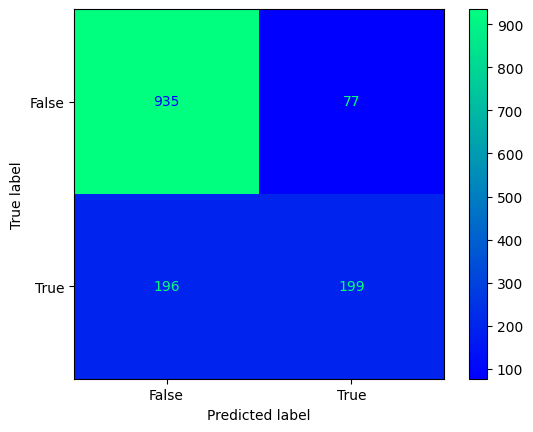

In [118]:
# evaluate predictions
conf_mtx_svc = confusion_matrix(y_churn_test, y_svc_pred)

conf_mtx_svc_plot = ConfusionMatrixDisplay(
    confusion_matrix=conf_mtx_svc,
    display_labels=[False,True]
)

conf_mtx_svc_plot.plot(cmap='winter')

plt.savefig('assets/telco-customer-churn_24.webp', bbox_inches='tight')

![Telco Customer Churn Dataset](assets/telco-customer-churn_24.webp)

In [117]:
report_svc = classification_report(
    y_churn_test, y_svc_pred
)
print(report_svc)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1012
           1       0.72      0.50      0.59       395

    accuracy                           0.81      1407
   macro avg       0.77      0.71      0.73      1407
weighted avg       0.80      0.81      0.79      1407



|        | precision | recall | f1-score | support |
| --     | --    | --   | --   | --   |
|      0 |  0.83 | 0.92 | 0.87 | 1012 |
|      1 |  0.72 | 0.50 | 0.59 |  395 |
| accuracy |   |      | 0.81 | 1407 |
| macro avg |  0.77 | 0.71 | 0.73 | 1407 |
| weighted avg |  0.80 | 0.81 | 0.79 | 1407 |